In [1]:
# https://www.youtube.com/watch?v=JqTASBiMVT8&ab_channel=EngineerHunter
import numpy as np
import matplotlib.pyplot as plt

# objective function (to be minimized)
def sphere_function(x):
    z = np.sum(np.square(x))
    return z

# Parameters
# H. A. Hefny and S. S. Azab, "Chaotic particle swarm optimization," 2010 The 7th International Conference on Informatics and Systems (INFOS), 2010, pp. 1-8.
swarm_size = 50
c1, c2 = 2.5, 2.5
iterMax = 1000  # Max iterations (Stopping criteria)
inertia_weight = 0.9 - ((0.9-0.4)/iterMax)*np.linspace(0, iterMax, iterMax)
xMin, xMax = -100, 100  # Initial position range
vMin, vMax = xMin, xMax  # Velocity limit (Nao entendi o uso do lambda)
d = 30  # Dimension
Result = np.zeros(iterMax) # Save Gbest values

def limit_velocity(V):
    for i in range(len(V)):
        if V[i] > vMax:
            V[i] = vMax
        if V[i] < vMin:
            V[i] = vMin
    return V

def limit_position(X):
    for i in range(len(X)):
        if X[i] > xMax:
            X[i] = xMax
        if X[i] < xMin:
            X[i] = xMin
    return X        

In [2]:
#%% PSO
# Kennedy, J., & Eberhart, R. (n.d.). Particle swarm optimization. Proceedings of ICNN’95 - International Conference on Neural Networks. doi:10.1109/icnn.1995.488968
def optimization():
    class particle():
        def __init__(self):
            self.position = np.random.uniform(xMin, xMax, [swarm_size,d])
            self.velocity = np.zeros([swarm_size,d])
            # self.velocity = np.random.uniform(vMin, vMax, [swarm_size,d])
            self.cost = np.zeros(swarm_size)
            self.cost[:] = sphere_function(self.position[:])
            self.pbest = np.copy(self.position)
            self.pbest_cost = np.copy(self.cost)
            self.index = np.argmin(self.pbest_cost)
            self.gbest = self.pbest[self.index]
            self.gbest_cost = self.pbest_cost[self.index]
            self.best_cost_iteration = np.zeros(iterMax)
        def evaluate(self):
            for i in range(iterMax):
                for ii in range(swarm_size):
                    self.velocity[ii] = (inertia_weight[i]*self.velocity[ii]
                                        +c1*np.random.rand(d)*(self.pbest[ii]-self.position[ii])
                                        +c2*np.random.rand(d)*(self.gbest-self.position[ii]))
                    self.velocity[ii] = limit_velocity(self.velocity[ii])
                    self.position[ii] = self.position[ii] + self.velocity[ii]
                    # self.position[ii] = limit_position(self.position[ii])
                    self.cost[ii] = sphere_function(self.position[ii])
                    if self.cost[ii] < self.pbest_cost[ii]:
                        self.pbest[ii] = self.position[ii]
                        self.pbest_cost[ii] = self.cost[ii]
                        if self.pbest_cost[ii] < self.gbest_cost:
                            self.gbest_cost = self.pbest_cost[ii]
                self.best_cost_iteration[i] = self.gbest_cost                        
        def plot(self):
            plt.semilogy(self.best_cost_iteration)
            plt.ylabel('Best function value')
            plt.xlabel('Number of iteration')            
            plt.title('PSO of sphere function')            
            print("Gbest", self.gbest_cost)                    
    a = particle()     
    a.evaluate()
    a.plot()

Gbest 38254.24243714395
Gbest 35099.151907957836
Gbest 26628.61475349075
Gbest 34665.12693068292
Gbest 34817.402697407415
Gbest 35113.43912258061
Gbest 36027.60568293877
Gbest 33867.59182233319
Gbest 37999.416961366325
Gbest 27696.107321139443
Gbest 31055.139304136283
Gbest 29055.867120465136
Gbest 39279.05289925079
Gbest 44686.969170906734
Gbest 39985.70560155167
Gbest 30918.744592343643
Gbest 34227.12728852083
Gbest 31457.66438841592
Gbest 37335.50090226033
Gbest 41886.67785724222
Gbest 23602.063646274844
Gbest 41545.88735394211
Gbest 28953.078320323664
Gbest 31170.992047359105
Gbest 28301.306659450805
Gbest 36191.38667472578
Gbest 26407.434409531874
Gbest 40023.96169962113
Gbest 35377.638314415984
Gbest 35019.399642783625
Gbest 40497.63774937632
Gbest 37602.827882815625
Gbest 38282.548916846594
Gbest 42581.20386010301
Gbest 35256.56424098962
Gbest 37173.79174784394
Gbest 32514.1410708298
Gbest 32039.697444408303
Gbest 29434.12286814057
Gbest 25396.538827690194
Gbest 32472.9827461147

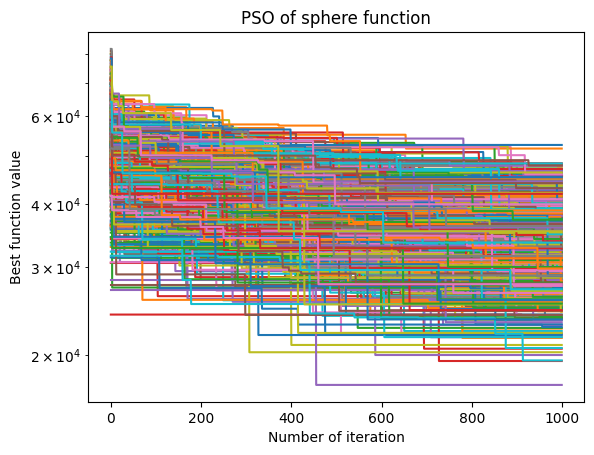

In [3]:
#%% Run
for i in range(iterMax):
    Gbest = optimization()   